# Bar plots for model comparison (32 participants), eLife check
## hierarchical models (28 subjects per frame)

In [21]:
import glam
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Define the values of  WAIC for the models


In [24]:
D_Inv_Full1 = np.load(str('results/waic/glam_PF2019_full_hierarchical_Less_NoBin_Inv_Gamma-11_NUTS_33_eLife2.npy'))
D_Full1 = np.load(str('results/waic/glam_PF2019_full_hierarchical_Less_NoBin_Gamma-11_NUTS_33_eLife2.npy'))
#D_NoBias1 = np.load(str('results/waic/glam_PF2019_nobias_individual_Dislike_NoBin_Gamma-11_NUTS_31.npy'))
#D_Inv_NoBias1 = np.load(str('results/waic/glam_PF2019_nobias_individual_Dislike_Inv_NoBin_Gamma-11_NUTS_31.npy'))

L_Full1 = np.load(str('results/waic/glam_PF2019_full_hierarchical_More_NoBin_Gamma-11_NUTS_33_eLife2.npy'))
#L_NoBias1 = np.load(str('results/waic/glam_PF2019_nobias_individual_Like_NoBin_Gamma-11_NUTS_31.npy'))

In [33]:
D_Inv_Full1

array([15063.891935358417, 0.0, 77.76727282780145, 8000, 1, True,
       'negative_log'], dtype=object)

In [26]:
D_Full1[0]

15233.222461067375

In [27]:
# extract waic values
D_Inv_Full = []
D_Full = []
#D_NoBias = []
#D_Inv_NoBias = []
L_Full = []
#L_NoBias = []

# Participants to remove 
toElmiminate = [1,13,16,20]
toDrop = [x - 1 for x in toElmiminate]

D_Inv_Full.append(D_Inv_Full1[0]) 
D_Full.append(D_Full1[0])
L_Full.append(L_Full1[0]) 

In [28]:
# Load WAIC-score
Models_WAIC = [np.mean(L_Full),np.mean(D_Inv_Full),np.mean(D_Full)]
Models_WAIC_part = [L_Full,D_Inv_Full,D_Full]

x = np.arange(len(Models_WAIC))

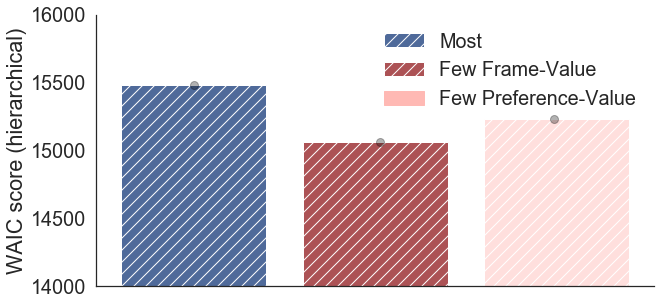

In [34]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.set(style='white', font_scale=1.8)

ax.set_facecolor('xkcd:white')
plt.bar(x, Models_WAIC, color=['#4F6A9A',  '#AC5255', '#FFDFDD'],hatch='//')
#plt.xticks(x, ('', 'Frame-Evidence', 'Preference-Evidence'))
plt.ylabel('WAIC score (hierarchical)')
plt.ylim(14000,16000)

like_patch = mpatches.Patch(facecolor='#4F6A9A',hatch='//', label='Most')
dislike_patch = mpatches.Patch(facecolor='#AC5255',hatch='//', label='Few Frame-Value')
dislike2_patch = mpatches.Patch(color='#FFB9B4',hatch='', label='Few Preference-Value')

leg = plt.legend(handles=[like_patch,dislike_patch,dislike2_patch])
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

for i in range(len(Models_WAIC)):
    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
sns.despine()
ax.set_xticklabels([])

plt.show()

#fig.savefig(str('SavedFigures/GLAM_individual_WAIC_ModelComparison_31.png'), dpi = 200 )

# --- [END] ----